<a href="https://colab.research.google.com/github/EltonKM/EltonKM/blob/circleci-project-setup/pneumonia_radiografia_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Conecta com o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Descompacta o arquivo
import zipfile
zip_path = '/content/drive/MyDrive/chest_xray.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

In [ ]:
#Importa as bibliotecas
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
#Separa os diretórios de treino, validação e teste
train_dir = '/content/dataset/chest_xray/train'
val_dir = '/content/dataset/chest_xray/val'
test_dir = '/content/dataset/chest_xray/test'

In [ ]:
#Redimensiona as imagens para 150x150 pixels
img_height, img_width = 150, 150
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
#Classfica as imagens entre treino e teste
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_height, img_width),
                                                    batch_size=batch_size,
                                                    class_mode='binary')

val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=(img_height, img_width),
                                                batch_size=batch_size,
                                                class_mode='binary')

In [ ]:
#Constroi a CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Treina o modelo
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=val_generator)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 75s 430ms/step - accuracy: 0.7190 - loss: 0.9393 - val_accuracy: 0.6875 - val_loss: 0.7182
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 67s 412ms/step - accuracy: 0.8628 - loss: 0.3149 - val_accuracy: 0.8750 - val_loss: 0.6554
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 67s 410ms/step - accuracy: 0.8866 - loss: 0.2644 - val_accuracy: 0.8125 - val_loss: 0.6919
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 67s 410ms/step - accuracy: 0.8991 - loss: 0.2551 - val_accuracy: 0.7500 - val_loss: 0.7488
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 67s 411ms/step - accuracy: 0.9066 - loss: 0.2213 - val_accuracy: 0.8750 - val_loss: 0.3950
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 67s 413ms/step - accuracy: 0.9063 - loss: 0.2312 - val_accuracy: 0.8125 - val_loss: 0.7220
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 67s 412ms/step - accuracy: 0.9290 - loss: 0.1999 - val_accuracy: 0.7500 - val_loss: 0.6239
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 67s 410ms/step - accuracy: 0.9160 - loss: 0

In [ ]:
#Acurácia
test_generator = val_datagen.flow_from_directory(test_dir,
                                                 target_size=(img_height, img_width),
                                                 batch_size=batch_size,
                                                 class_mode='binary')

loss, acc = model.evaluate(test_generator)
print(f'Acurácia no teste: {acc:.2f}')

Found 624 images belonging to 2 classes.
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 192ms/step - accuracy: 0.8906 - loss: 0.2957
Acurácia no teste: 0.91


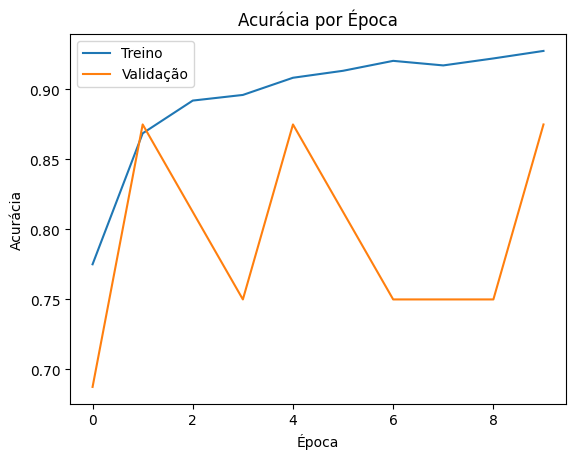

In [ ]:
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.legend()
plt.title('Acurácia por Época')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.show()